<a href="https://colab.research.google.com/github/Saikat-too/Neural_Network_From_Scratch/blob/main/build_makemore_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# read all the words
words = open ('names.txt' , 'r' ).read().splitlines()

In [5]:
len(words)

32033

In [6]:
# build the vocabulary of characters and mapping to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [54]:

# build the dataset

block_size = 3 # context length : how many characters do we take to predict the next one ?
X , Y = [] , []

for w in words:
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '-->' , itos[ix])
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [55]:


X.shape , X.dtype , Y.shape , Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [115]:
# Build the dataset

def build_dataset(words):
  block_size  = 3
  X = []
  Y = []
  for w in words:
  #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '-->' , itos[ix])
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  return X , Y


import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))
Xtr , Ytr = build_dataset(words[:n1])
Xdev , Ydev = build_dataset(words[n1:n2])
Xte , Yte = build_dataset(words[n2:])

In [56]:
C = torch.randn((27 , 2))

In [57]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [58]:
W1 = torch.randn(6 , 100)
b1 = torch.rand(100)

In [59]:
torch.cat(torch.unbind(emb , 1) , 1).shape

torch.Size([228146, 6])

In [13]:
emb.shape

torch.Size([32, 3, 2])

In [15]:
h = emb.view(32 , 6) @ W1 + b1

In [18]:
h.shape

torch.Size([32, 100])

In [19]:
W2 = torch.randn((100 , 27))
b2 = torch.randn(27)

In [20]:
logits = h @ W2 + b2

In [21]:
counts = logits.exp()

In [22]:
prob = counts / counts.sum(1 , keepdims  = True)

In [24]:
loss = -prob[torch.arange(32) , Y].log().mean()
loss

tensor(14.4934)

In [25]:
# ------>> Now Made Respectable ------->>

In [138]:
Xtr.shape , Ytr.shape # Dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [146]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27 , 2) , generator=g)
W1 = torch.randn((6 , 300) , generator=g)
b1 = torch.rand((300) , generator=g)
W2 = torch.randn((300 , 27) , generator = g)
b2 = torch.randn((27) , generator = g)
parameters = [C , W1 , b1 , W2 , b2]


In [147]:
sum (p.nelement() for p in parameters)

10281

In [148]:
for p in parameters:
  p.requires_grad = True

In [149]:
lre = torch.linspace( -3 , 0  , 1000)
lrs = 10**lre

In [165]:
#lri = []
lossi = []
stepi = []
min_loss = 0
for i in range(30000):

  # mini batch construct

  ix = torch.randint(0 , Xtr.shape[0] , (32 , ))

  #Forward Pass
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1 , 6) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits , Ytr[ix])
  # print(loss.item())
  if loss.item() < min_loss or i == 0:
    min_loss = loss.item()

  # Backward Pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # Update
  #lr = lrs[i]
  lr = 0.05
  for p in parameters:
    p.data += -lr * p.grad

  #lri.append(lre[i])
  lossi.append(loss.item())
  stepi.append(i)


print(min_loss)

1.4935988187789917


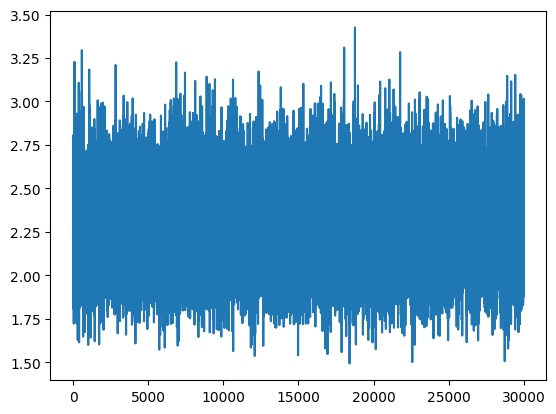

In [166]:
plt.plot(stepi , lossi)

In [169]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1 , 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits , Ytr)
loss

tensor(2.2924, grad_fn=<NllLossBackward0>)

In [168]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1 , 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits , Ydev)
loss

tensor(2.2989, grad_fn=<NllLossBackward0>)